In [ ]:
from google.colab import files
uploaded=files.upload()

Saving archive.zip to archive (3).zip


In [ ]:
import zipfile
import os
zip_path = "archive.zip"  # upload করা file name
extract_folder = "seeds_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Files extracted to:", extract_folder)
print(os.listdir(extract_folder))

Files extracted to: seeds_data
['seeds_dataset.txt']


**Dataset Load**

In [ ]:
import numpy as np

data_path = os.path.join(extract_folder, "seeds_dataset.txt")
data = np.loadtxt(data_path)

print("Data shape:", data.shape)

Data shape: (210, 8)


X and Y set

In [ ]:
x= data[:, :-1]
y = data[:, -1].astype(int) - 1
print(x)
print(y)

[[15.26   14.84    0.871  ...  3.312   2.221   5.22  ]
 [14.88   14.57    0.8811 ...  3.333   1.018   4.956 ]
 [14.29   14.09    0.905  ...  3.337   2.699   4.825 ]
 ...
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [11.84   13.21    0.8521 ...  2.836   3.598   5.044 ]
 [12.3    13.34    0.8684 ...  2.974   5.637   5.063 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


**Feature Normalize :**
**min -max normalization** ->এটা করলে প্রতিটা feature এর range [0,1] এ চলে আসবে।

In [ ]:
x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
print(x)
indices = np.arange(len(x))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

[[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


In [ ]:
np.random.seed(42)
W1 = np.random.randn(7, 12) * 0.1
b1 = np.random.randn(1, 12) * 0.01
W2 = np.random.randn(12, 3) * 0.1
b2 = np.zeros((1, 3))

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def softmax(z):
    e = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e / np.sum(e, axis=1, keepdims=True)

def sparse_cross_entropy(y_true, y_pred):
    n = len(y_true)
    return -np.mean(np.log(y_pred[np.arange(n), y_true] + 1e-9))

lr = 0.01
epochs = 3000

for epoch in range(epochs):
    # Forward
    z1 = x @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_pred = softmax(z2)

    # Loss
    loss = sparse_cross_entropy(y, y_pred)

    # Backpropagation
    dz2 = y_pred.copy()
    dz2[np.arange(len(y)), y] -= 1
    dz2 /= len(y)

    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_deriv(z1)
    dW1 = x.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update
    W2 -= lr * dW2; b2 -= lr * db2
    W1 -= lr * dW1; b1 -= lr * db1

    if epoch % 50 == 0:
        acc = np.mean(np.argmax(y_pred, axis=1) == y)
        print(f"Epoch {epoch}, Loss={loss:.4f}, Accuracy={acc:.3f}")

final_pred = np.argmax(y_pred, axis=1)
print("\nTrue labels:     ", y[:20]+1)
print("Predicted labels:", final_pred[:20]+1)


Epoch 0, Loss=1.0977, Accuracy=0.419
Epoch 50, Loss=1.0936, Accuracy=0.629
Epoch 100, Loss=1.0896, Accuracy=0.624
Epoch 150, Loss=1.0852, Accuracy=0.624
Epoch 200, Loss=1.0797, Accuracy=0.629
Epoch 250, Loss=1.0727, Accuracy=0.633
Epoch 300, Loss=1.0639, Accuracy=0.638
Epoch 350, Loss=1.0538, Accuracy=0.638
Epoch 400, Loss=1.0419, Accuracy=0.629
Epoch 450, Loss=1.0276, Accuracy=0.629
Epoch 500, Loss=1.0110, Accuracy=0.643
Epoch 550, Loss=0.9920, Accuracy=0.643
Epoch 600, Loss=0.9708, Accuracy=0.652
Epoch 650, Loss=0.9477, Accuracy=0.667
Epoch 700, Loss=0.9230, Accuracy=0.671
Epoch 750, Loss=0.8973, Accuracy=0.676
Epoch 800, Loss=0.8712, Accuracy=0.671
Epoch 850, Loss=0.8451, Accuracy=0.681
Epoch 900, Loss=0.8192, Accuracy=0.681
Epoch 950, Loss=0.7941, Accuracy=0.695
Epoch 1000, Loss=0.7699, Accuracy=0.710
Epoch 1050, Loss=0.7467, Accuracy=0.719
Epoch 1100, Loss=0.7245, Accuracy=0.762
Epoch 1150, Loss=0.7034, Accuracy=0.776
Epoch 1200, Loss=0.6834, Accuracy=0.776
Epoch 1250, Loss=0.6645

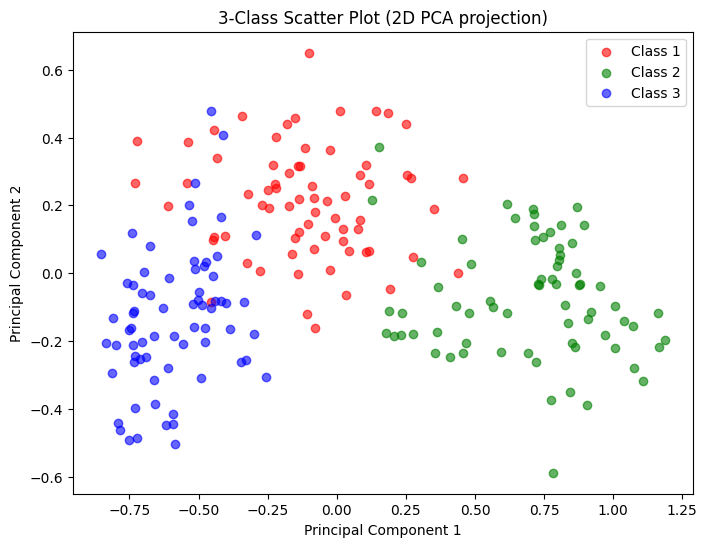

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
plt.figure(figsize=(8,6))

colors = ['red', 'green', 'blue']
labels = ['Class 1', 'Class 2', 'Class 3']

for i, color in enumerate(colors):
    plt.scatter(x_pca[y==i, 0], x_pca[y==i, 1], c=color, label=labels[i], alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('3-Class Scatter Plot (2D PCA projection)')
plt.legend()
plt.show()

[0 0 0 0 2 2 2 1 1 0 1 2 2 0 2 0 2 1 0 1]


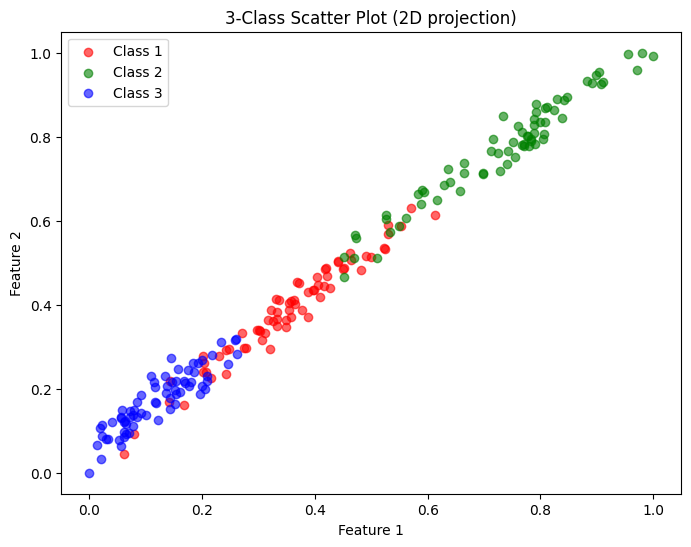

In [ ]:
print(y[:20])
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

colors = ['red', 'green', 'blue']
labels = ['Class 1', 'Class 2', 'Class 3']

for i, color in enumerate(colors):
    plt.scatter(x[y==i, 0], x[y==i, 1], c=color, label=labels[i], alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('3-Class Scatter Plot (2D projection)')
plt.legend()
plt.show()
